In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:

train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.2
)

In [4]:

train_generator = train_datagen.flow_from_directory(
    'flowers/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 3457 images belonging to 5 classes.


In [5]:

val_generator = train_datagen.flow_from_directory(
    'flowers/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 860 images belonging to 5 classes.


In [6]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [7]:

base_model.trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1227s 11s/step - accuracy: 0.6629 - loss: 7.2345 - val_accuracy: 0.8035 - val_loss: 0.7443
Epoch 2/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1256s 12s/step - accuracy: 0.8877 - loss: 0.3365 - val_accuracy: 0.8140 - val_loss: 0.6780
Epoch 3/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1301s 12s/step - accuracy: 0.9377 - loss: 0.2879 - val_accuracy: 0.8279 - val_loss: 0.8207
Epoch 4/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1338s 12s/step - accuracy: 0.9636 - loss: 0.1160 - val_accuracy: 0.8198 - val_loss: 1.1778
Epoch 5/5
109/109 ━━━━━━━━━━━━━━━━━━━━ 1245s 11s/step - accuracy: 0.9654 - loss: 0.1221 - val_accuracy: 0.8337 - val_loss: 0.8959


In [9]:

sample_images, sample_labels = next(val_generator)
predictions = model.predict(sample_images)
class_names = list(train_generator.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..151.561].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..151.561].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..151.561].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-116.279..151.561].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..138.72101].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..151.561].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18..151.561].
Clipping input da

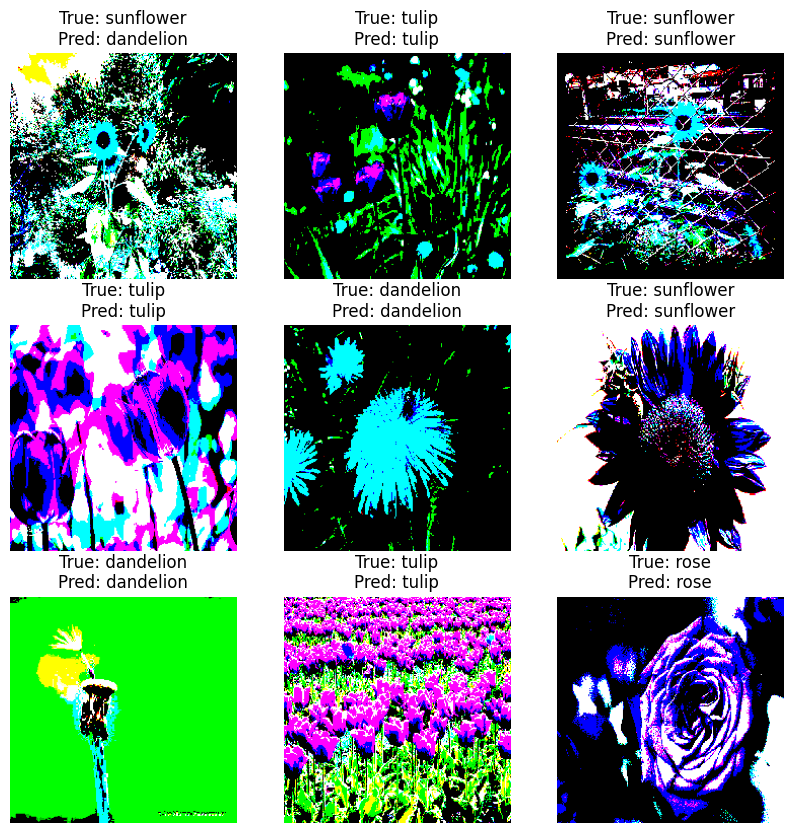

In [10]:

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i] + 0.5) 
    plt.title(f"True: {class_names[np.argmax(sample_labels[i])]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()